In [1]:
from lda_model import sent_to_words, process_data_words, build_model,format_topics_sentences
from lda_model import frequency_distribution_word_counts_in_documents, representative_sentence_for_each_topic, distribution_of_document_word_counts_by_dominant_topic
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [2]:
import os
os.getcwd()

'/home/yiyi/Documents/masterthesis/CPD/topic_modeling'

In [3]:
def pyldavis_plot(lda_model):
    """
    Show LDAvis .
    :param lda_model:
    :return:
    """
    import pyLDAvis.gensim
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
    vis

In [4]:
# load data for each corpus (each csv file)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
filepath='/home/yiyi/Documents/masterthesis/CPD/data/cleand_query_output_csv/019b8823-aa09-4d8f-8b8d-26433d76dff3'
df = pd.read_csv(filepath)

df = df.replace(np.nan, '', regex=True)
df.text = df.text.astype(str)
df.title = df.title.astype(str)
df["words"] = df.title+' '+df.text
en_df = df[df.lang=='en']
en_df= en_df[en_df.words.notnull()]

docs = en_df.words.to_list()  # => data
# process the data words
data_words = list(sent_to_words(docs))

data_ready = process_data_words(data_words)
# build lda model
corpus, lda_model = build_model(data_ready)

# format topics sentences

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

[(0,
  '0.050*"staff" + 0.044*"beach" + 0.039*"stay" + 0.037*"great" + 0.031*"pool" '
  '+ 0.030*"clean" + 0.027*"hotel" + 0.025*"room" + 0.025*"location" + '
  '0.021*"place"'),
 (1,
  '0.062*"service" + 0.020*"love" + 0.016*"reach" + 0.016*"drink" + '
  '0.016*"amazing" + 0.016*"experience" + 0.015*"vacation" + 0.015*"entire" + '
  '0.013*"amenity" + 0.013*"visit"'),
 (2,
  '0.026*"time" + 0.025*"call" + 0.023*"stay" + 0.018*"book" + 0.018*"day" + '
  '0.017*"check" + 0.017*"still" + 0.016*"old" + 0.015*"first" + 0.015*"wait"'),
 (3,
  '0.057*"room" + 0.034*"hotel" + 0.015*"stay" + 0.014*"property" + '
  '0.012*"pay" + 0.011*"elevator" + 0.011*"night" + 0.009*"expect" + '
  '0.009*"work" + 0.009*"price"')]


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.5269,"room, hotel, stay, property, pay, elevator, ni...","[really, worth, money, nickle, dim, half, show..."
1,1,1.0,0.3767,"service, love, reach, drink, amazing, experien...","[fantastic, time, excellent, resort, check, ma..."
2,2,0.0,0.5373,"staff, beach, stay, great, pool, clean, hotel,...","[probably, best, stay, resort, mid, relax, enj..."
3,3,3.0,0.3026,"room, hotel, stay, property, pay, elevator, ni...","[friendly, staff, luxury, suite, smaller, expe..."
4,4,0.0,0.7354,"staff, beach, stay, great, pool, clean, hotel,...","[stay, night, night, beautiful, property, clea..."
5,5,3.0,0.5839,"room, hotel, stay, property, pay, elevator, ni...","[reservation, long, time, ago, yet, arrive, gi..."
6,6,2.0,0.6931,"time, call, stay, book, day, check, still, old...","[left, roon, call, several, time, send, severa..."
7,7,0.0,0.4636,"staff, beach, stay, great, pool, clean, hotel,...","[modern, convenience, room, tastfully, decorat..."
8,8,2.0,0.5593,"time, call, stay, book, day, check, still, old...","[stay, staff, excellent, helpful, excellent, r..."
9,9,3.0,0.4393,"room, hotel, stay, property, pay, elevator, ni...","[reach, resort, lovely, hotel, nestle, beach, ..."


In [5]:
sent_topics_sorteddf_mallet = representative_sentence_for_each_topic(df_topic_sents_keywords)

In [6]:
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9724,"staff, beach, stay, great, pool, clean, hotel, room, location, place","[recamend, resort, location, great, relax, staff, great, took_care, taxi, place, activite, hotel..."
1,1.0,0.8478,"service, love, reach, drink, amazing, experience, vacation, entire, amenity, visit","[eat, food, service, substandard]"
2,2.0,0.8838,"time, call, stay, book, day, check, still, old, first, wait","[week, hit, rmarkable, job, cleaning, mess]"
3,3.0,0.9709,"room, hotel, stay, property, pay, elevator, night, expect, work, price","[awful, hotel, awful, room, reservation, change, hotel, staff, determine, people, room, double, ..."


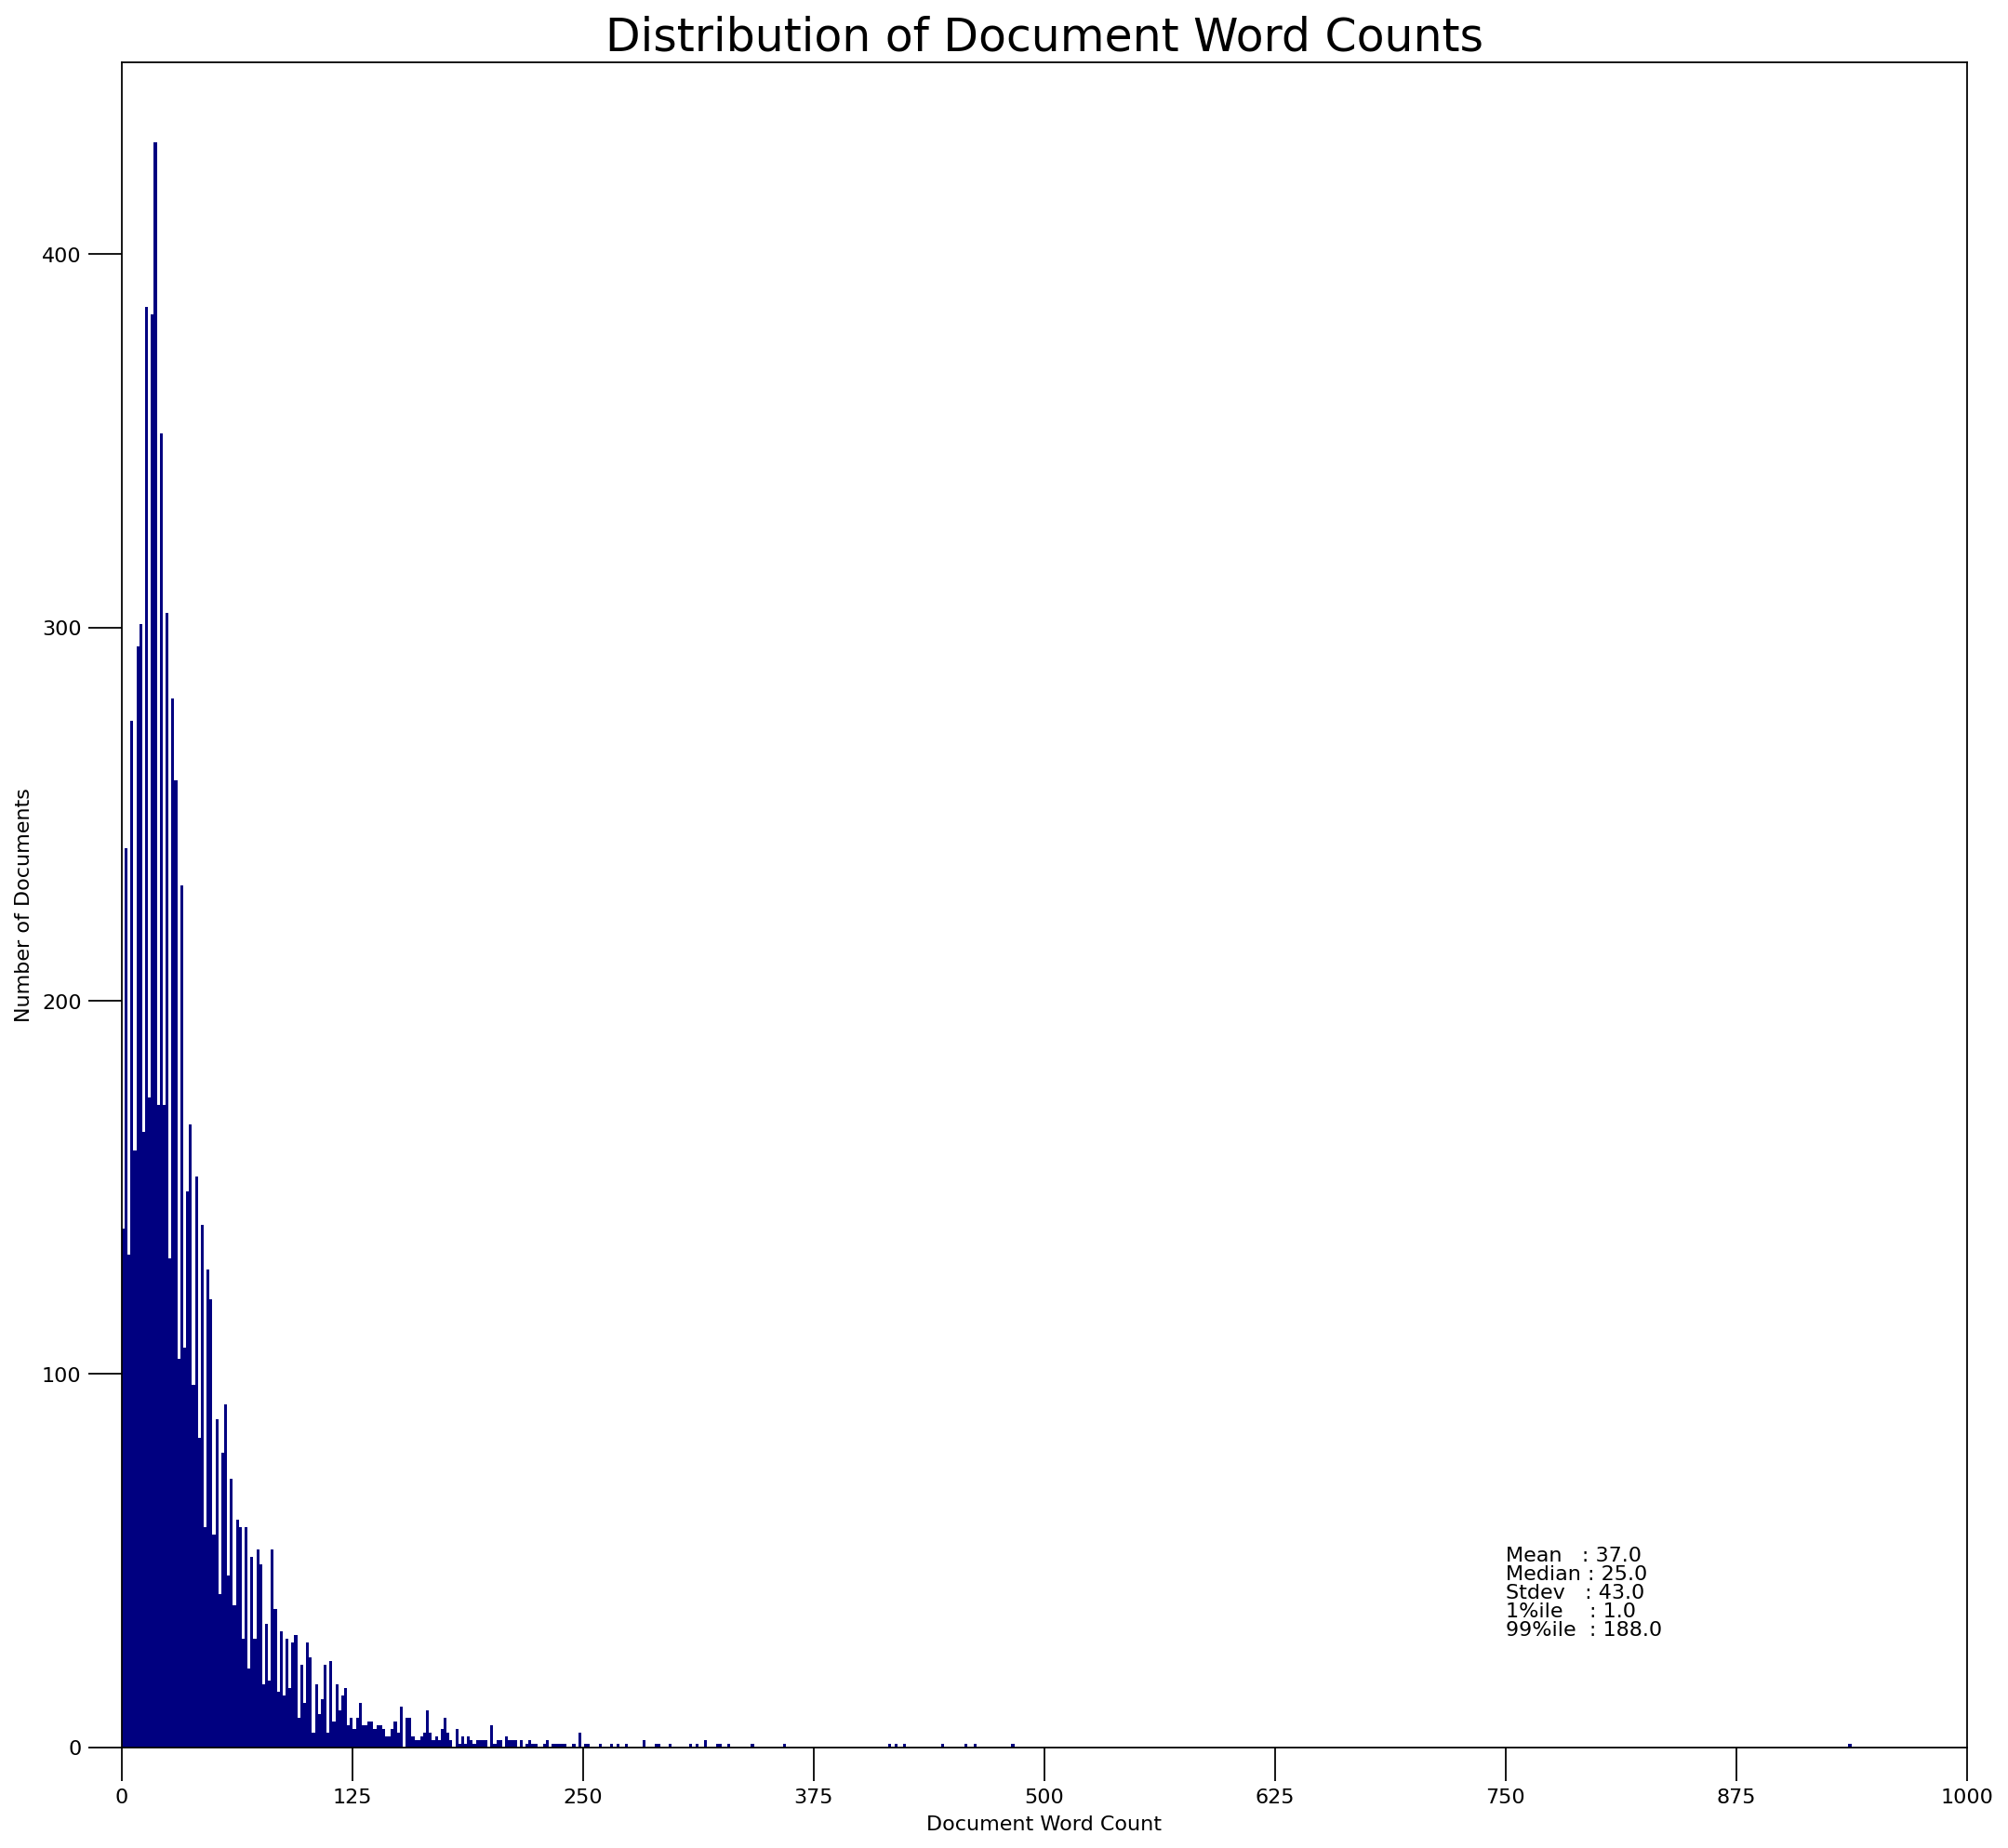

In [7]:
frequency_distribution_word_counts_in_documents(df_dominant_topic)

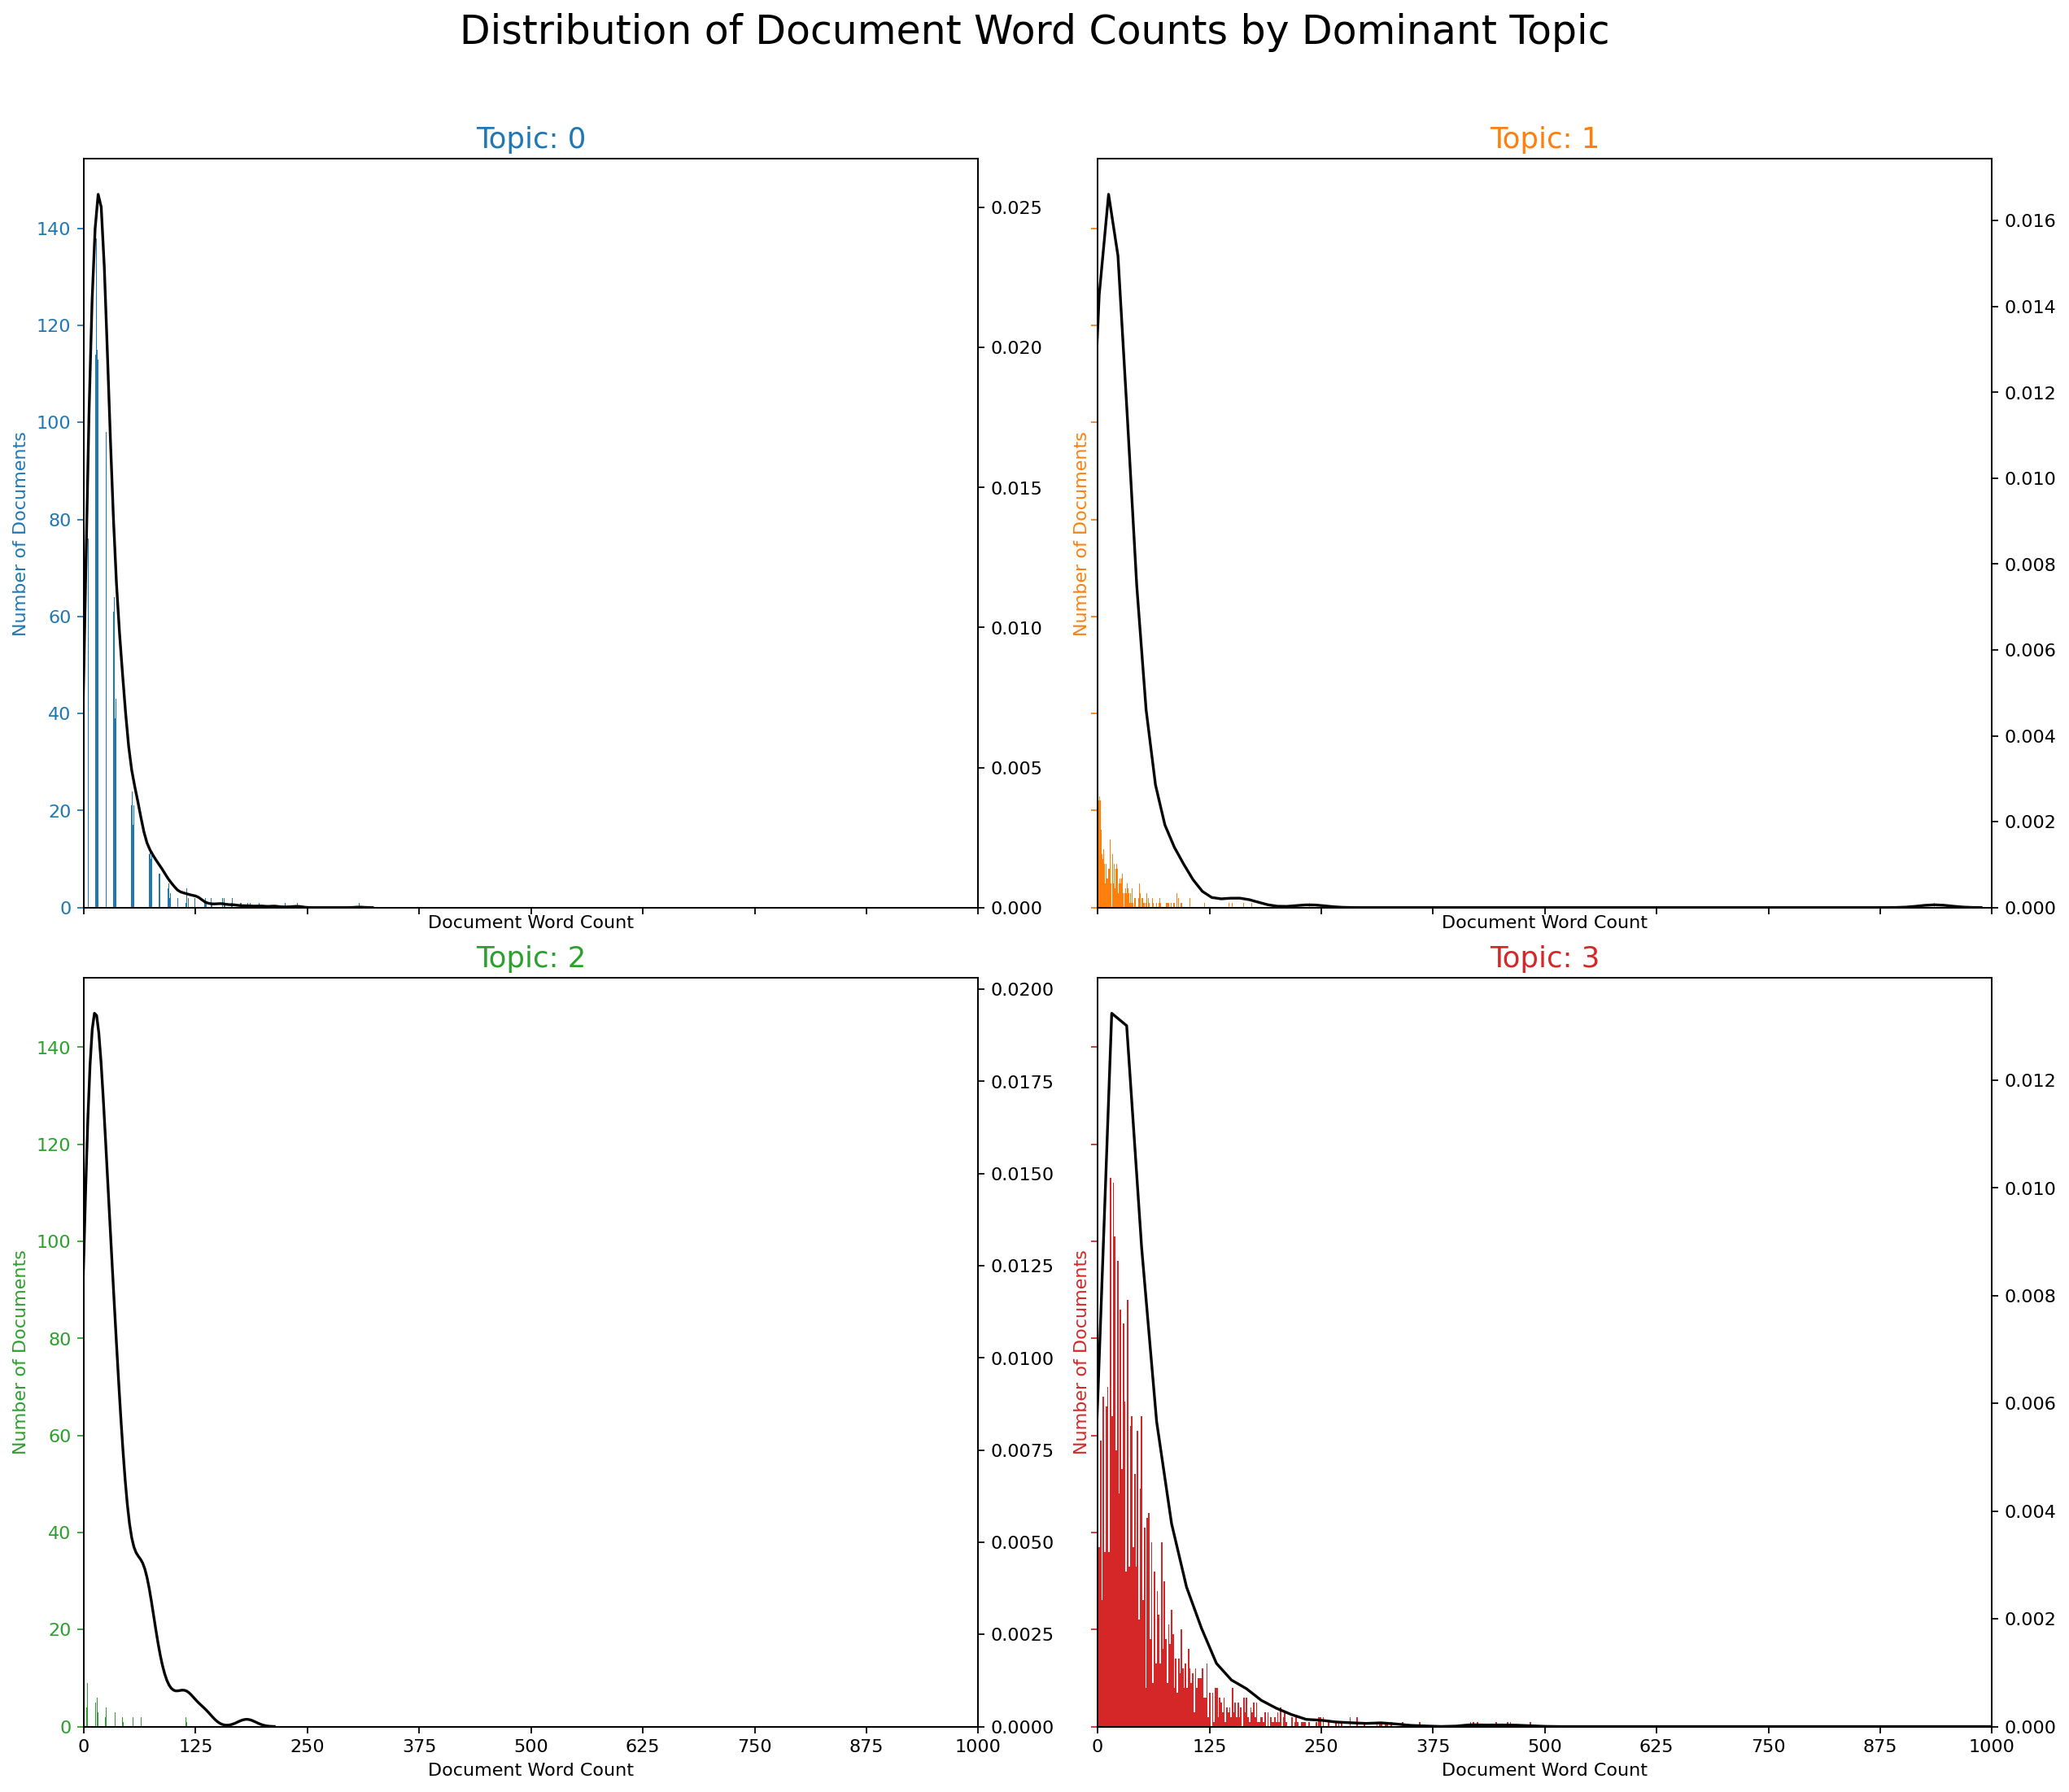

In [8]:
distribution_of_document_word_counts_by_dominant_topic(df_dominant_topic)

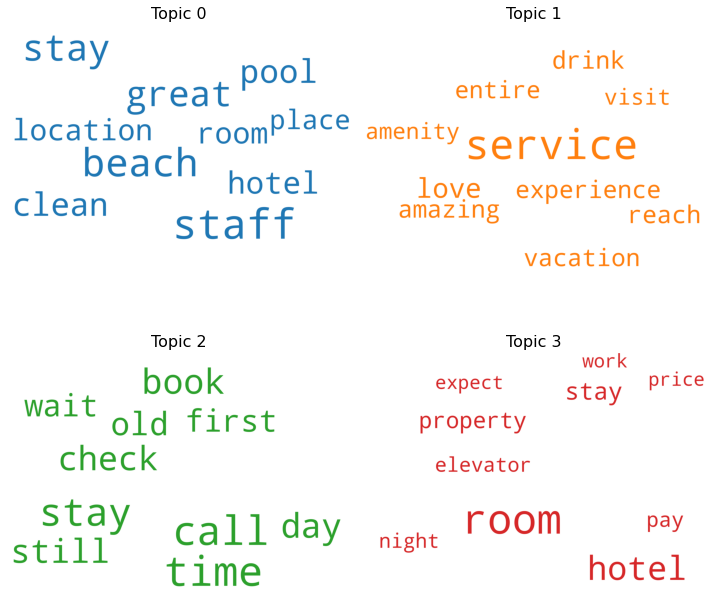

In [9]:
from lda_model import word_clouds_top_n_keywords_by_topic
word_clouds_top_n_keywords_by_topic(lda_model)

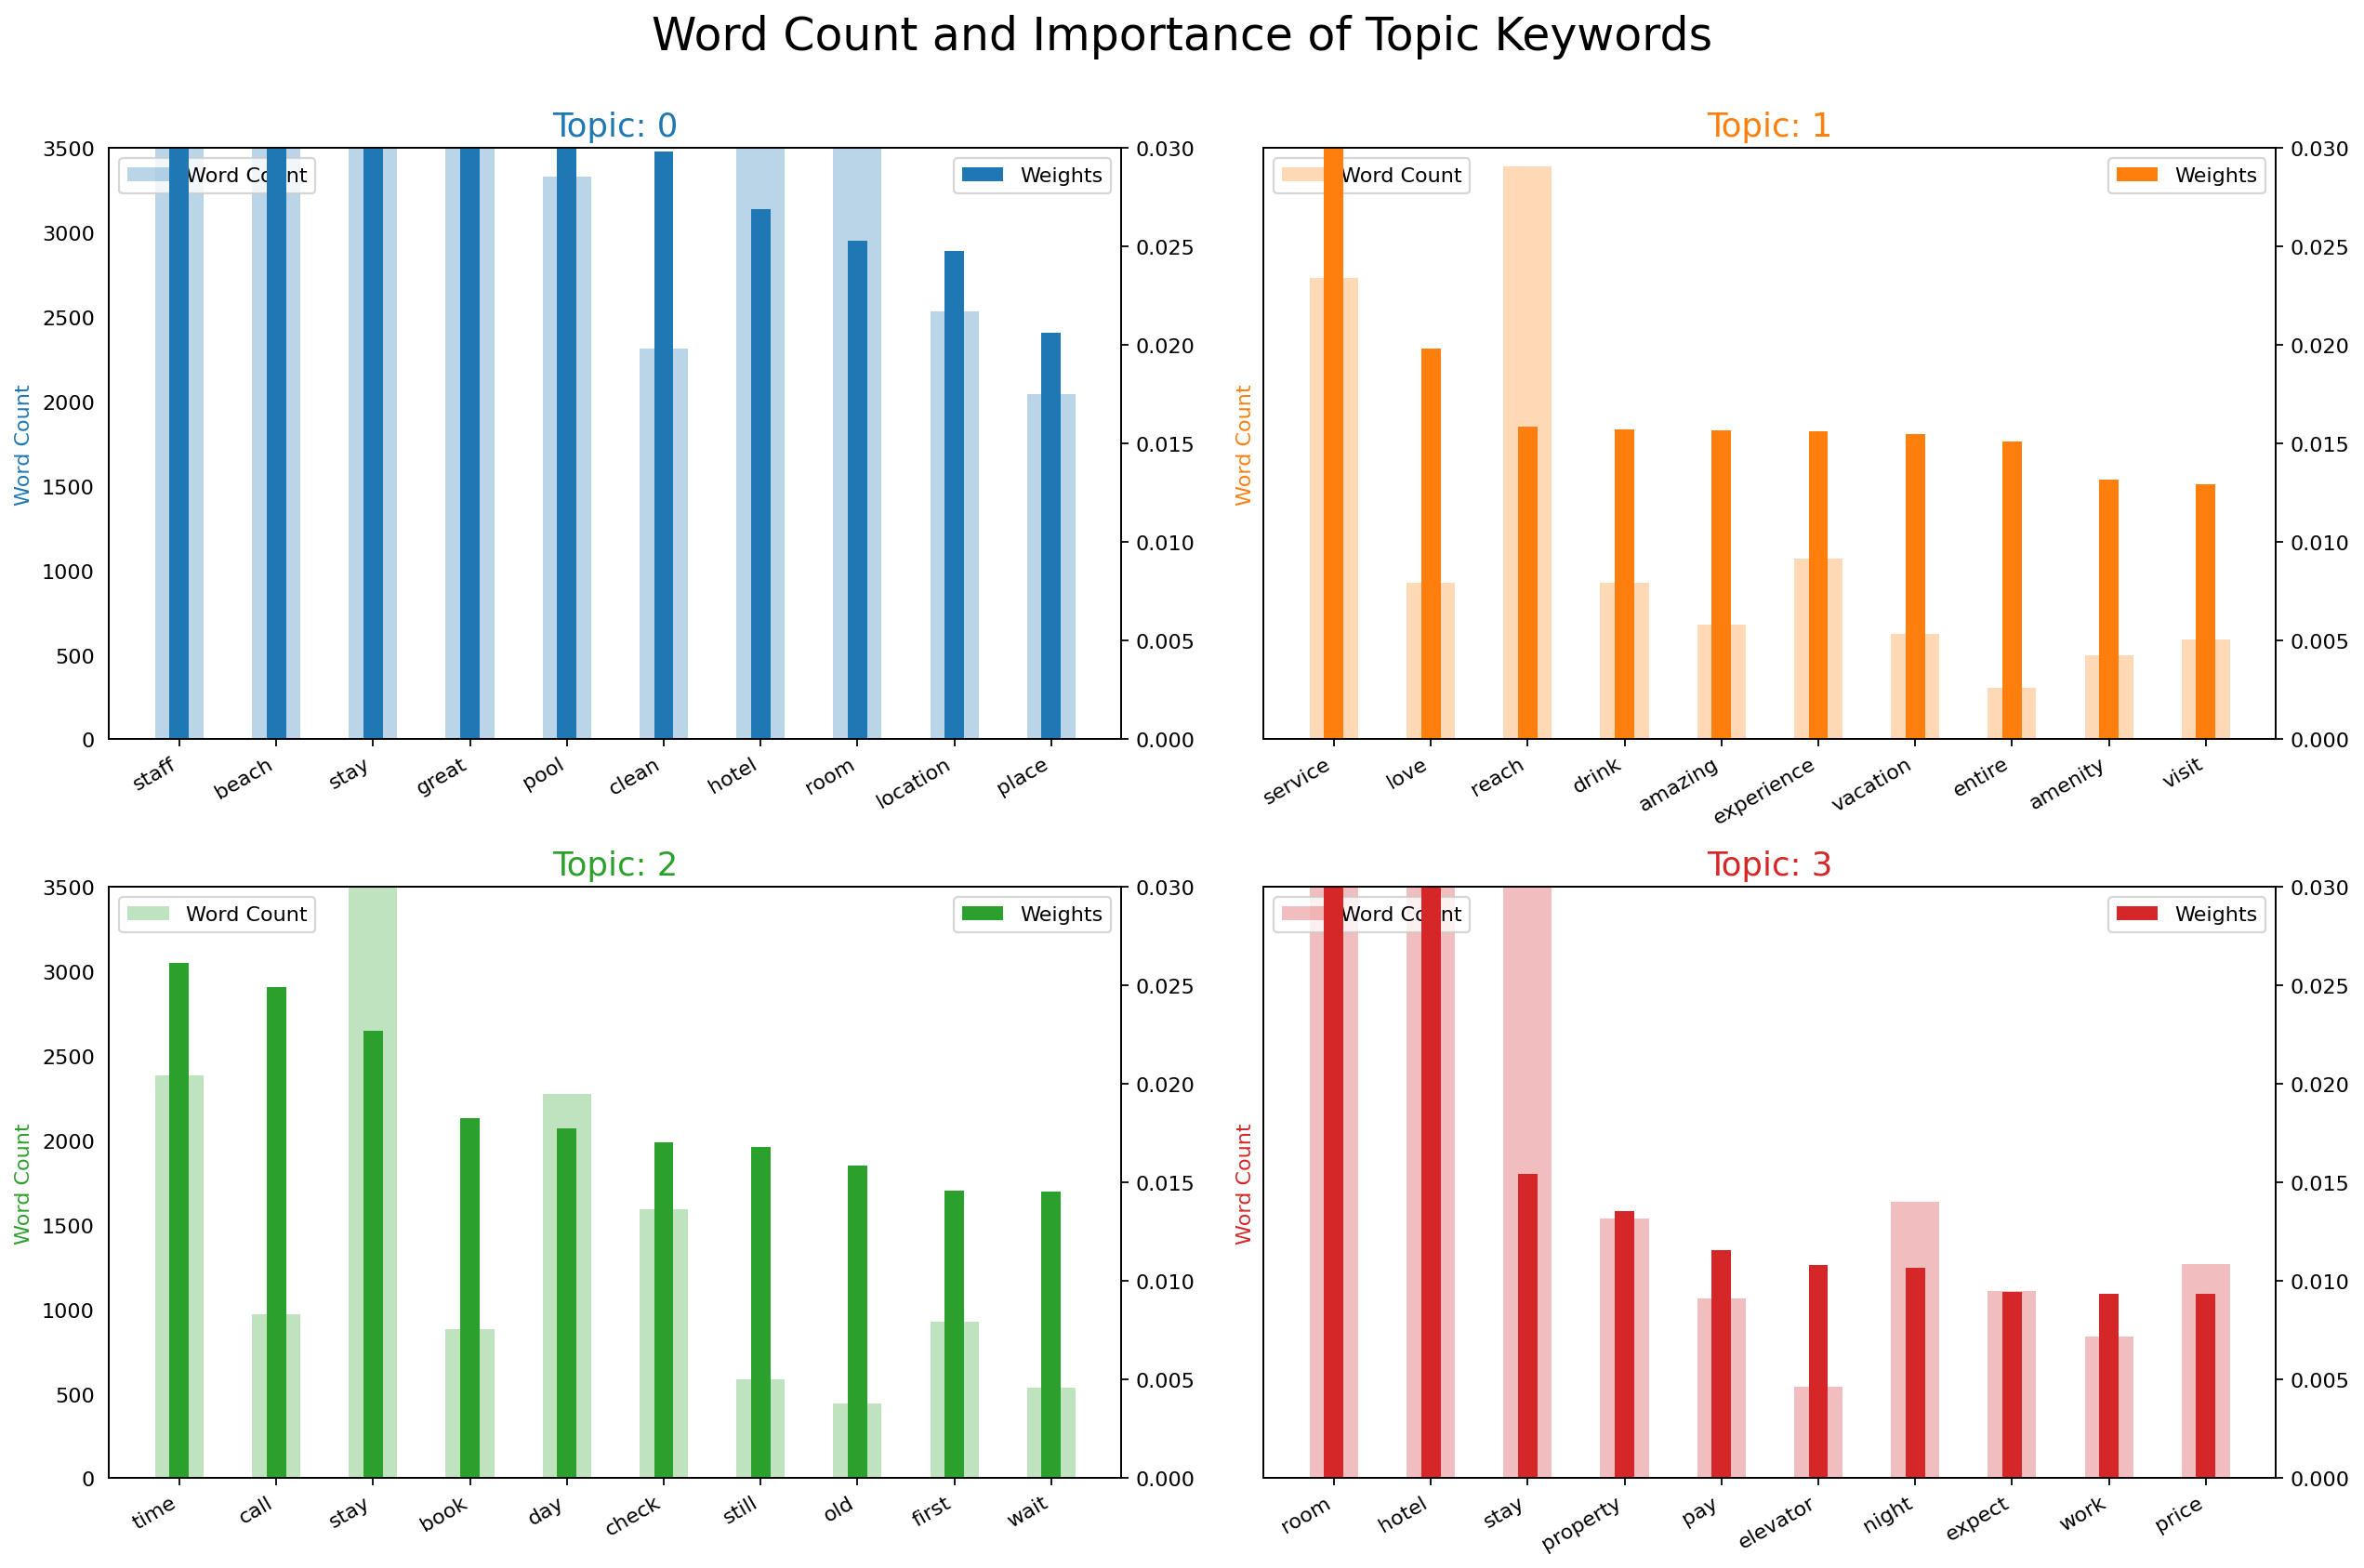

In [10]:
import importlib
from lda_model import word_counts_of_topic_keywords
word_counts_of_topic_keywords(lda_model, data_ready)

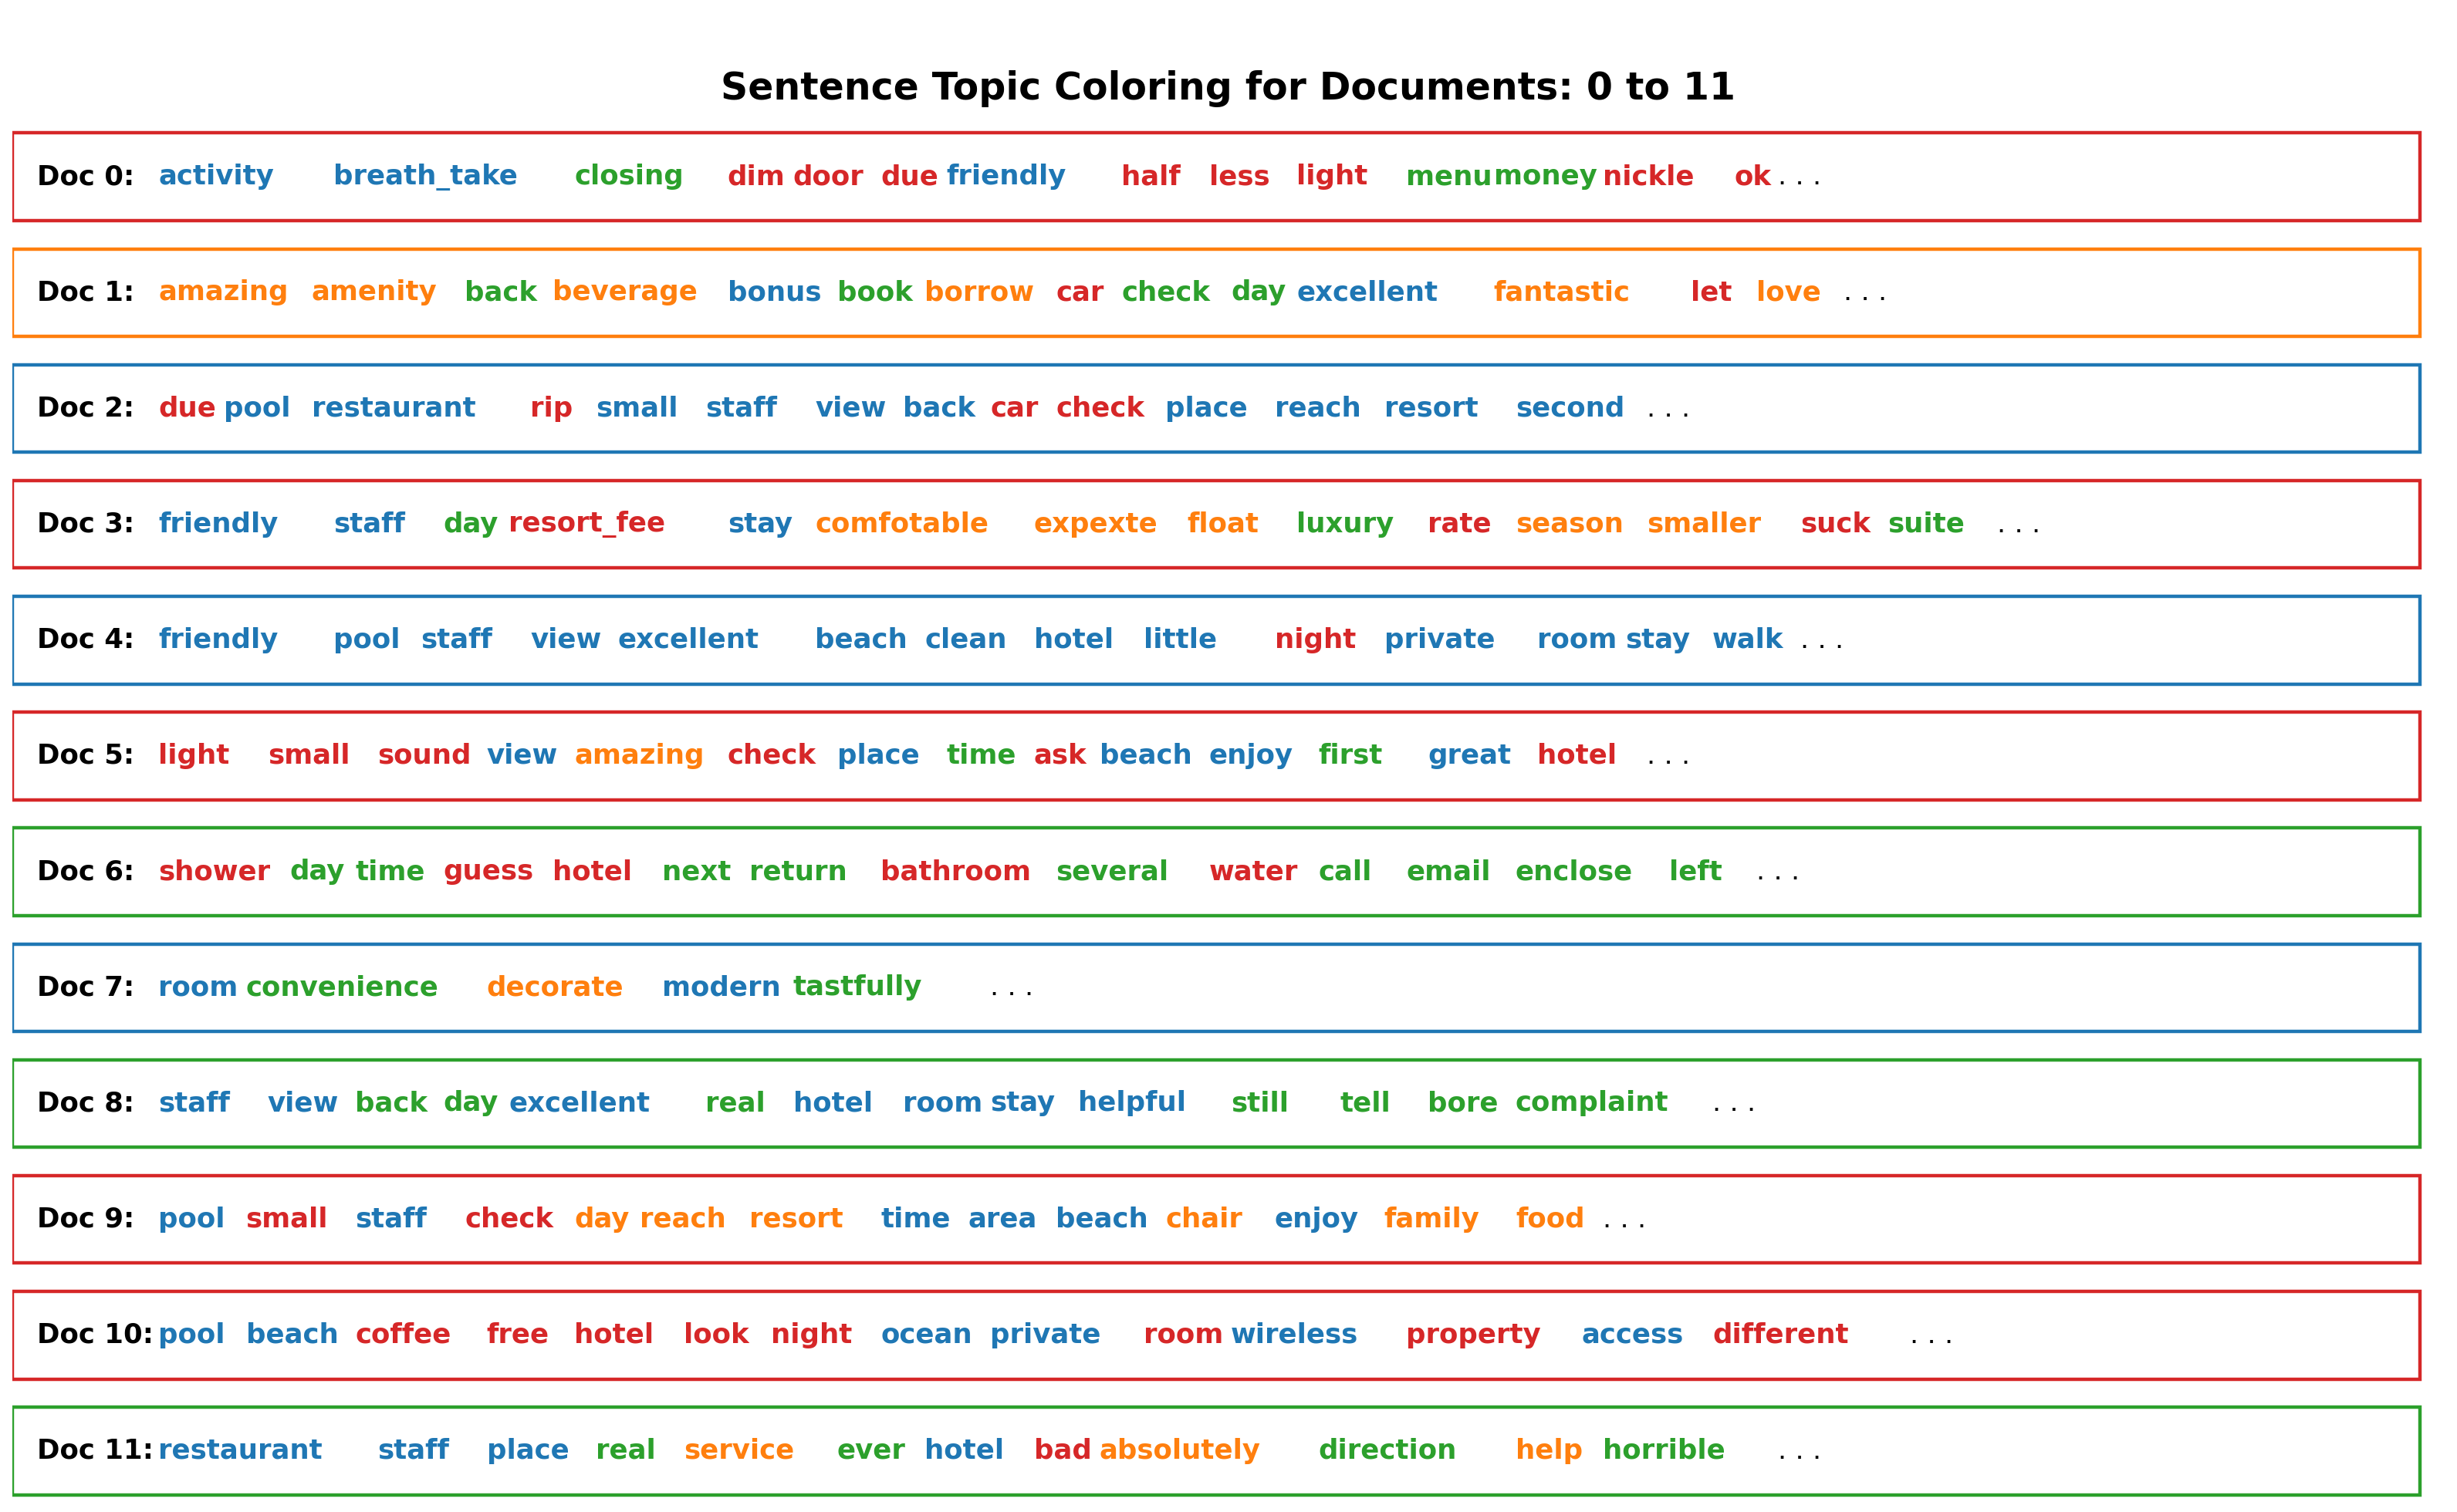

In [11]:
from lda_model import sentence_chart_colored_by_topic
sentence_chart_colored_by_topic(lda_model,corpus)

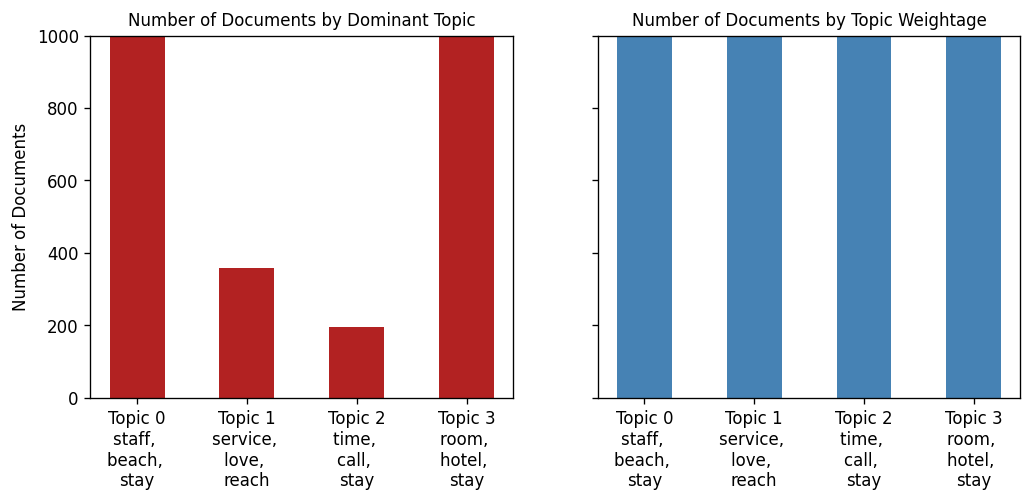

In [12]:
from lda_model import plots_number_of_documents_topic_weightage
plots_number_of_documents_topic_weightage(lda_model, corpus)

In [13]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.185042 -0.050808       1        1  35.766346
3      0.204791 -0.054196       2        1  35.185589
1     -0.273142 -0.209356       3        1  14.765806
2     -0.116692  0.314360       4        1  14.282263, topic_info=        Term         Freq        Total Category  logprob  loglift
50   service  2723.000000  2723.000000  Default  30.0000  30.0000
64     beach  4653.000000  4653.000000  Default  29.0000  29.0000
96     great  3923.000000  3923.000000  Default  28.0000  28.0000
24     staff  5871.000000  5871.000000  Default  27.0000  27.0000
139     room  8652.000000  8652.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
31      back   570.282898  1133.669922   Topic4  -4.3146   1.2591
38       day   756.162781  2198.211426   Topic4  -4.0324   0.8790
143     stay   968.977966  6782.091797   Topic4  -3.7845   0.0004
45     place   383.922516  2586.424316   Topic4  -4.7103   0.0386
46     reach   381.522675  2478.047607   Topic4  -4.7165   0.0751

[207 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
339       3  0.998397  absolutely
184       1  0.998846      access
574       3  0.997011  additional
277       3  0.998831      always
29        3  0.998989     amazing
...     ...       ...         ...
401       1  0.998387   wonderful
662       1  0.051038        work
662       2  0.947576        work
28        4  0.999062       worth
489       4  0.998786        year

[203 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

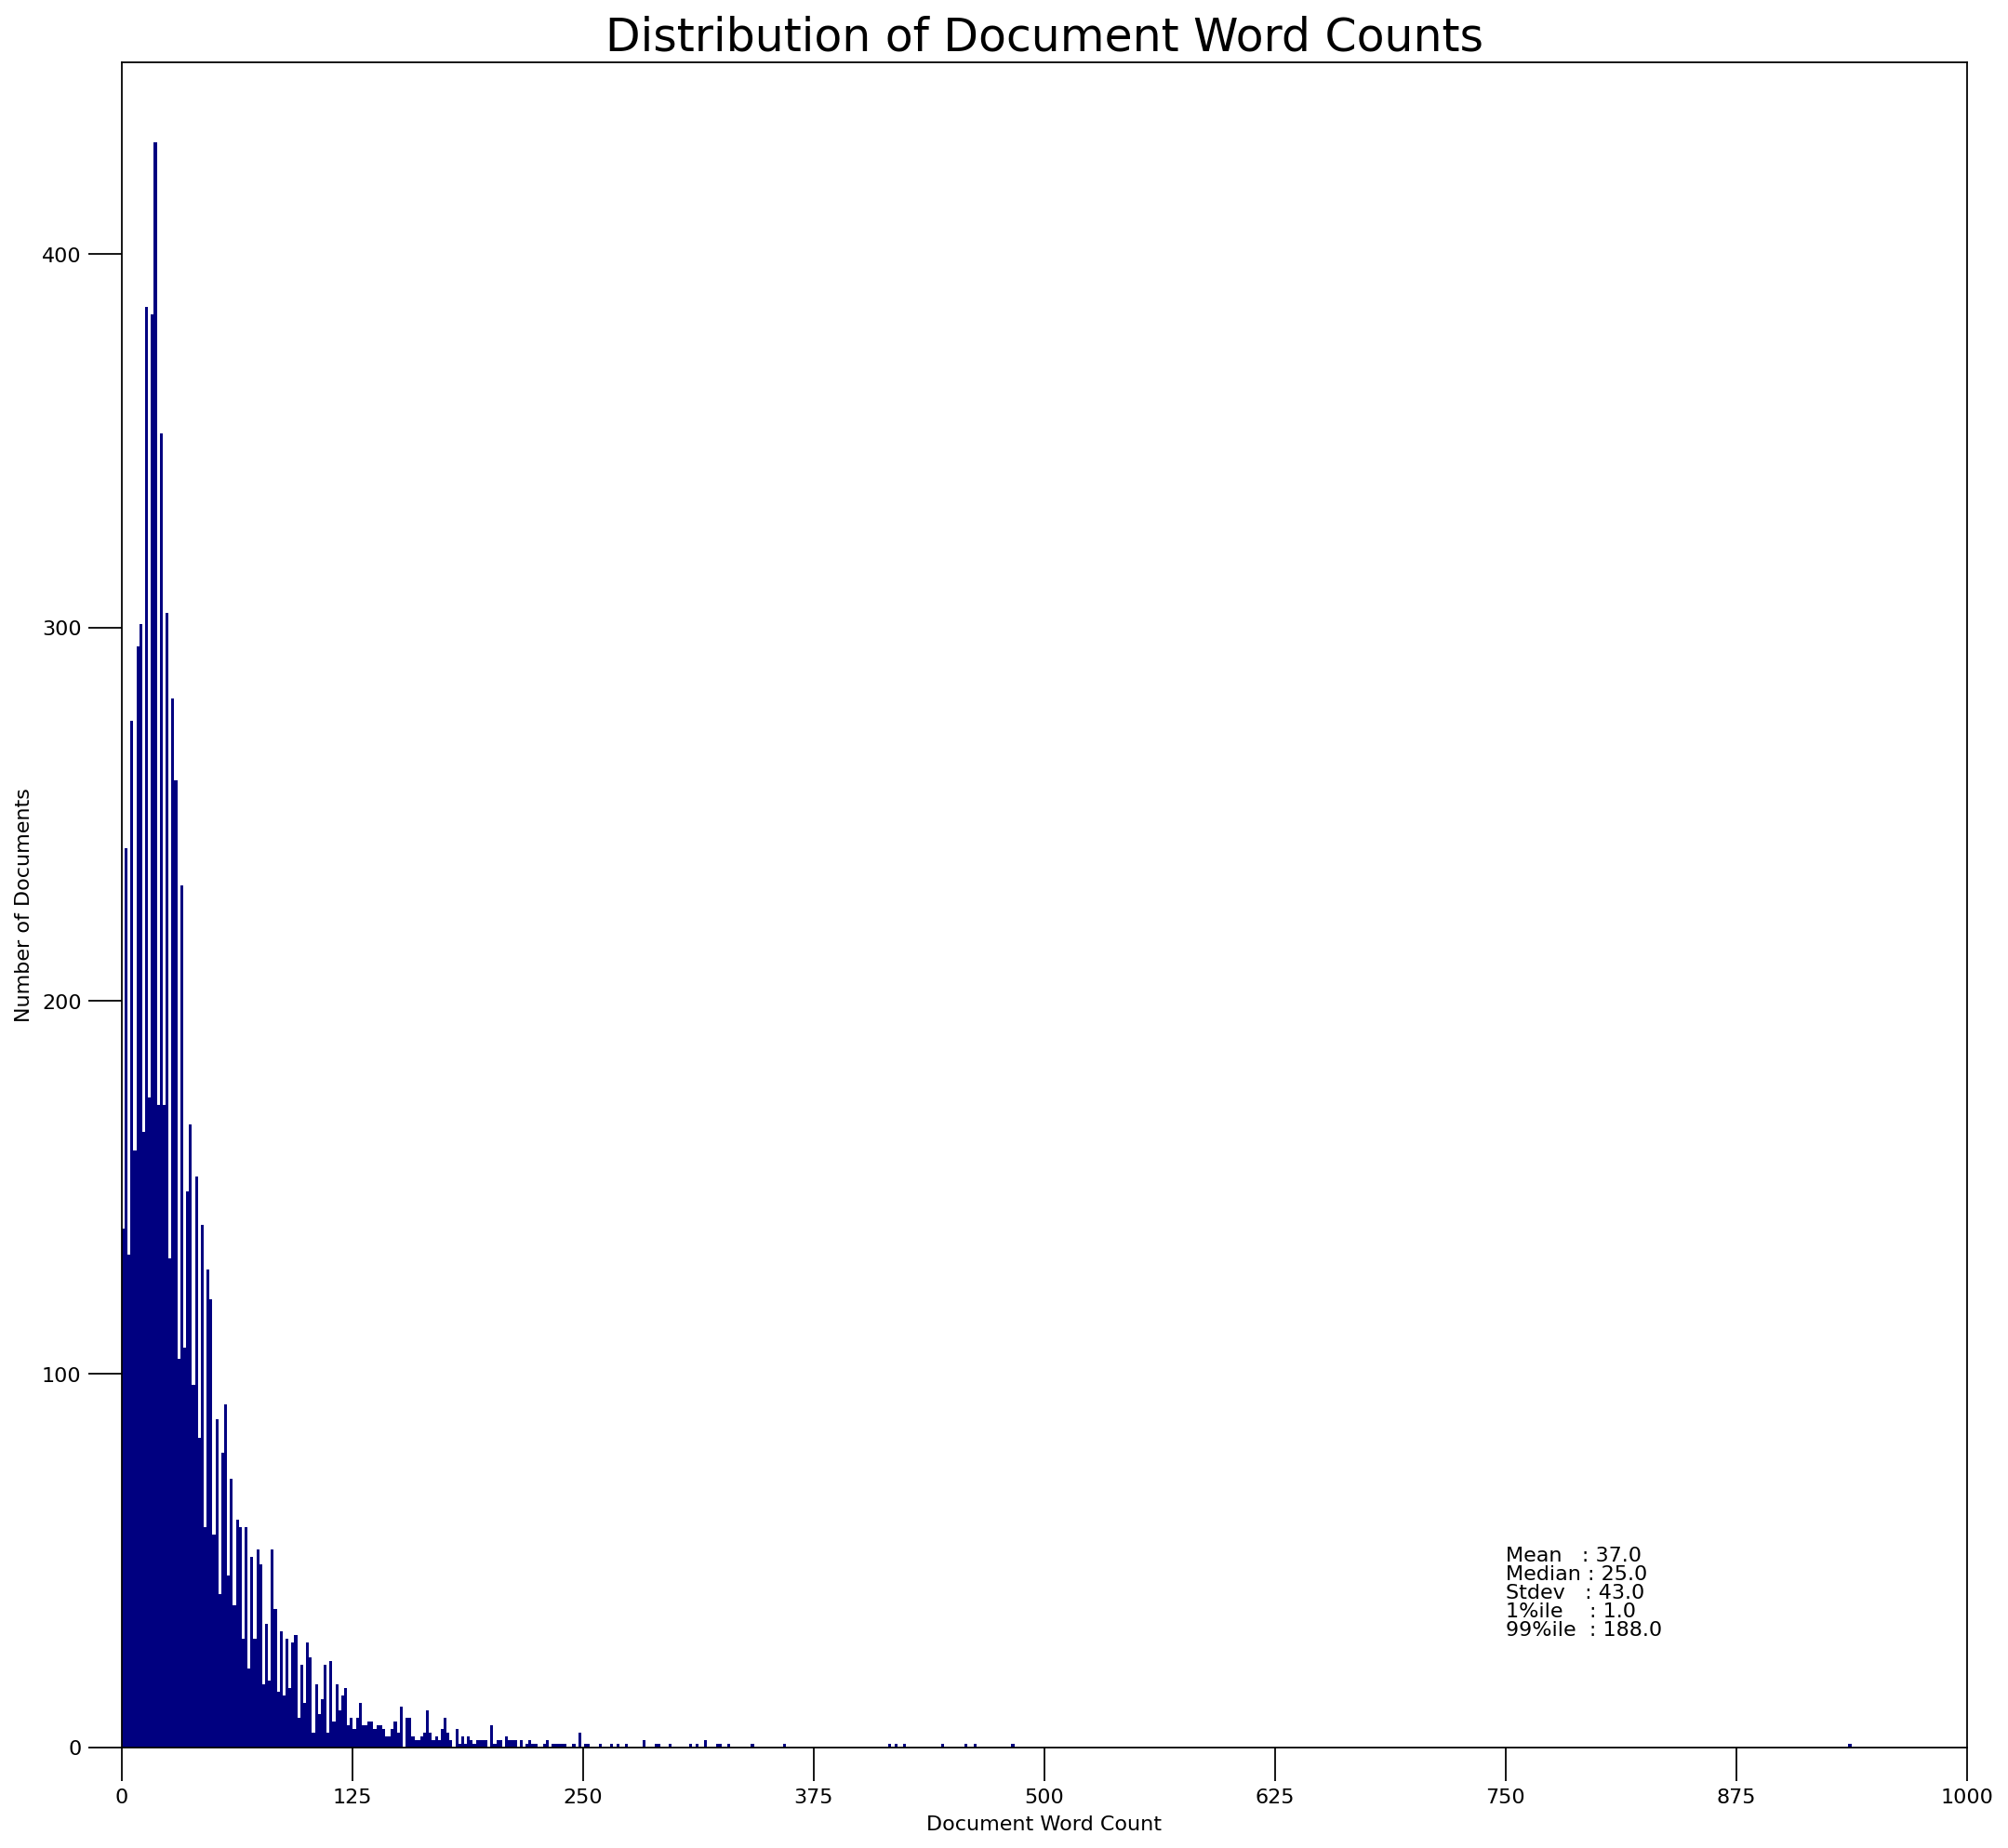

In [14]:
frequency_distribution_word_counts_in_documents(df_dominant_topic)


In [15]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import numpy as np

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7694 samples in 0.007s...
[t-SNE] Computed neighbors for 7694 samples in 0.138s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7694
[t-SNE] Computed conditional probabilities for sample 2000 / 7694
[t-SNE] Computed conditional probabilities for sample 3000 / 7694
[t-SNE] Computed conditional probabilities for sample 4000 / 7694
[t-SNE] Computed conditional probabilities for sample 5000 / 7694
[t-SNE] Computed conditional probabilities for sample 6000 / 7694
[t-SNE] Computed conditional probabilities for sample 7000 / 7694
[t-SNE] Computed conditional probabilities for sample 7694 / 7694
[t-SNE] Mean sigma: 0.002041
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.074089
[t-SNE] KL divergence after 1000 iterations: 1.088594


Loading BokehJS ...

In [16]:
len(corpus), len(corpus[0])

(8069, 29)